# Qiskit Pulse Gate Visualizations

## Imports

In [1]:
from qiskit import assemble, pulse, QuantumCircuit,\
                   schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit.visualization import plot_histogram
from qiskit.visualization.pulse_v2 import draw

# fake quantum computer we're using
backend = mock.FakeArmonk()

# hide pulsesimulator warning
import warnings
warnings.filterwarnings('ignore')

## Pulse to Gate

### Create a custom gate

In [2]:
gate = Gate(name='hadamard', label='H', num_qubits=1, params=[])

### Build pulse for custom gate

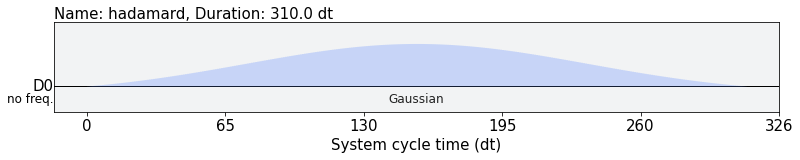

In [3]:
# create a microwave pulse with a gaussian curve
with pulse.build(backend, name='hadamard') as gate_pulse:
    # custom pulse for this demo
    microwave = Gaussian(duration=310, amp=.36, sigma=80)
    pulse.play(microwave, pulse.drive_channel(0))

gate_pulse.draw()

### Use custom gate

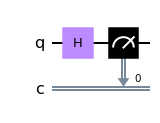

In [4]:
qc = QuantumCircuit(1, 1)

# append the custom gate
qc.append(gate, [0])
qc.measure(0, 0)

# define pulse of quantum gate
qc.add_calibration('hadamard', [0], gate_pulse)

qc.draw('mpl')

## Gate to Pulse

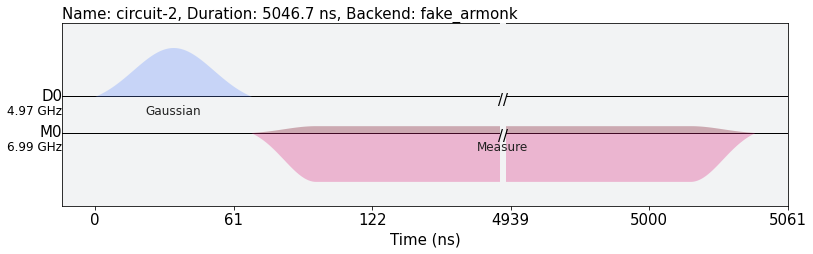

In [5]:
# unnecessary with calibrated gates
qc_t = transpile(qc, backend)

qc_pulse = schedule(qc_t, backend)

draw(qc_pulse, backend=backend)

## Execute Circuit

In [6]:
# create a pulse simulator and model
backend_sim = PulseSimulator()
backend_model = PulseSystemModel.from_backend(backend)

# prepare the pulse job
pulse_qobj = assemble(qc_pulse, backend=backend_sim)

# run the job on the backend
sim_result = backend_sim.run(pulse_qobj, backend_model).result()

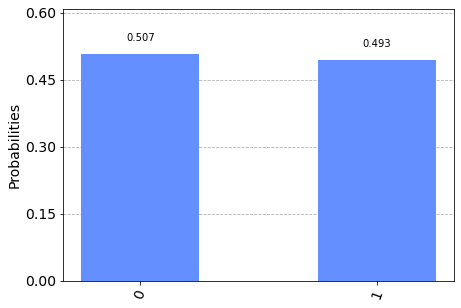

In [7]:
# plot circuit output
plot_histogram(sim_result.get_counts())